In [1]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

import gridworld
gridworld = importlib.reload(gridworld)
GridWorld = gridworld.GridWorld
import policy_gradient 
import reinforce
policy_gradient = importlib.reload(policy_gradient)
reinforce = importlib.reload(reinforce)

Policy = policy_gradient.Policy
Reinforce = reinforce.Reinforce
#import seaborn as sns

# REINFORCE

Using derivation of gradient from L4

In [ ]:
state_space = 25
action_space = 4

num_episodes = 500
num_samples = 50
num_step= 25
num_traj = 50
alpha=0.01 
gamma=1

In [ ]:
pg_none = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_none_rewards, var_none = pg_none.train(num_episode=num_episodes, num_traj=num_traj, num_step=num_step, num_samples=num_samples, alpha=alpha)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG No Additions")
plt.plot(pg_none_rewards)
plt.show()

In [ ]:
pg_caus = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_caus_rewards, var_causality = pg_caus.train(num_episode=num_episodes, 
                                         num_traj=num_traj, 
                                         num_step=num_step, 
                                         num_samples=num_samples, 
                                         alpha=alpha,
                                         causality=True
                                        )
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG Causality")
plt.plot(pg_caus_rewards)
plt.show()

In [ ]:
pg_imsa = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_imsa_rewards, var_imsa = pg_imsa.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, importance_sampling=True)

plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Importance Sampling")
plt.plot(pg_imsa_rewards)
plt.show()

In [ ]:
pg_baseline = Reinforce(GridWorld(),state_space,action_space,Policy())
baseline_rewards, var_baseline = pg_baseline.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, baseline_shift=True)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Baseline Shift")
plt.plot(baseline_rewards)
plt.show()

In [30]:
pg_all = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_all_rewards, var_pg_all = pg_all.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, baseline_shift=True, causality=True, importance_sampling=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [31]:
pg_np_baseline = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_np_baseline_rewards, var_pg_np_baseline = pg_np_baseline.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, baseline_shift=False,causality=True, importance_sampling=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [32]:
pg_no_causality = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_no_causality_rewards, var_pg_no_causality = pg_no_causality.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, baseline_shift=True,causality=False, importance_sampling=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [33]:
pg_no_imsa = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_no_imsa_rewards, var_pg_no_imsa = pg_no_imsa.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, baseline_shift=True,causality=True, importance_sampling=False)

Widget Javascript not detected.  It may not be installed or enabled properly.


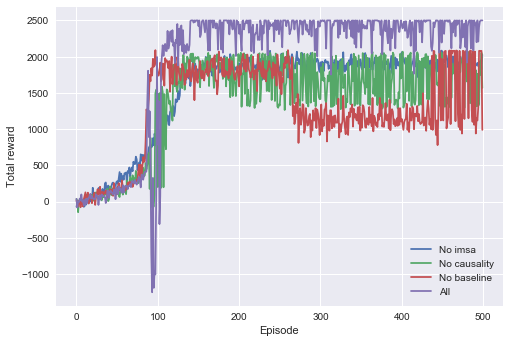

In [34]:
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.plot(pg_no_imsa_rewards, label='No imsa')
plt.plot(pg_no_causality_rewards, label='No causality')
plt.plot(pg_np_baseline_rewards, label='No baseline')
plt.plot(pg_all_rewards, label='All')
plt.legend()
plt.show()

In [35]:
def showImagesHorizontally(list_of_images):
    fig = plt.figure(figsize=(50, 40))
    number_of_imgs = len(list_of_images)
    for i in range(number_of_imgs):
        a=fig.add_subplot(1,number_of_imgs,i+1)
        image = list_of_images[i]
        plt.imshow(image)
        plt.axis('off')

In [16]:
print(np.mean(np.var(np.sum(var_pg_all, axis=2))))
print(np.mean(np.var(np.sum(var_baseline, axis=2))))
print(np.mean(np.var(np.sum(var_imsa, axis=2))))
print(np.mean(np.var(np.sum(var_causality, axis=2))))
print(np.mean(np.var(np.sum(var_none, axis=2))))

137.30210044
238.431836
277.46983036
191.67725276
177.52839479


In [ ]:
np.mean(np.var(np.sum(var_imsa, axis=2)))